In [1]:
"""Import packages"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import cv2
import tensorflow as tf
import time

%matplotlib inline

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [3]:
model_savename = 'model-checkpoint'

NameError: name 'sess' is not defined

In [ ]:
read_dir = './test_images/'

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
TBD

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
TBD

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
TBD

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
TBD

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [2]:
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
### To start off let's do a basic data summary.
labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))
print(' ')
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)




dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
 
X_train shape =  (39209, 32, 32, 3)
y_train shape =  (39209,)
X_test shape =  (12630, 32, 32, 3)
y_test shape =  (12630,)
Type of X_train =  <class 'numpy.ndarray'>
Type of y_train =  <class 'numpy.ndarray'>
 
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [5]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict

import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        i4 = random.randrange(len_index)
        i5 = random.randrange(len_index)
        i6 = random.randrange(len_index)
        i7 = random.randrange(len_index)
        i8 = random.randrange(len_index)
        i9 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        index4 = pos_index[i4]
        index5 = pos_index[i5]
        index6 = pos_index[i6]
        index7 = pos_index[i7]
        index8 = pos_index[i8]
        index9 = pos_index[i9]

        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        im4 = X[index4][:][:][:]
        im5 = X[index5][:][:][:]
        im6 = X[index6][:][:][:]
        im7 = X[index7][:][:][:]
        im8 = X[index8][:][:][:]
        im9 = X[index9][:][:][:]
     
        plt.figure()
        plt.subplot(331)
        plt.imshow(im1)
        plt.subplot(332)
        plt.imshow(im2)
        plt.subplot(333)
        plt.imshow(im3)

        plt.subplot(334)
        plt.imshow(im4)
        plt.subplot(335)
        plt.imshow(im5)
        plt.subplot(336)
        plt.imshow(im6)
        
        plt.subplot(337)
        plt.imshow(im7)
        plt.subplot(338)
        plt.imshow(im8)
        plt.subplot(339)
        plt.imshow(im9)
        
        plt.show() 
    plt.close("all")
    


In [6]:
"""Organize images into dictionaries"""
class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

In [ ]:
"""Display random images from training set"""
plot_random(X_train, class_dict_train)

In [ ]:
"""Display random images from testing set"""
plot_random(X_test, class_dict_test)

Class 00 has 0210 entries
Class 01 has 2220 entries
Class 02 has 2250 entries
Class 03 has 1410 entries
Class 04 has 1980 entries
Class 05 has 1860 entries
Class 06 has 0420 entries
Class 07 has 1440 entries
Class 08 has 1410 entries
Class 09 has 1470 entries
Class 10 has 2010 entries
Class 11 has 1320 entries
Class 12 has 2100 entries
Class 13 has 2160 entries
Class 14 has 0780 entries
Class 15 has 0630 entries
Class 16 has 0420 entries
Class 17 has 1110 entries
Class 18 has 1200 entries
Class 19 has 0210 entries
Class 20 has 0360 entries
Class 21 has 0330 entries
Class 22 has 0390 entries
Class 23 has 0510 entries
Class 24 has 0270 entries
Class 25 has 1500 entries
Class 26 has 0600 entries
Class 27 has 0240 entries
Class 28 has 0540 entries
Class 29 has 0270 entries
Class 30 has 0450 entries
Class 31 has 0780 entries
Class 32 has 0240 entries
Class 33 has 0689 entries
Class 34 has 0420 entries
Class 35 has 1200 entries
Class 36 has 0390 entries
Class 37 has 0210 entries
Class 38 has

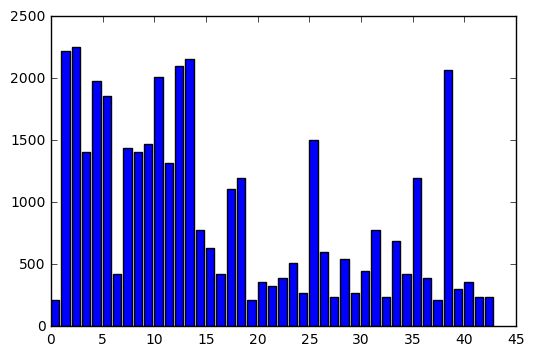

In [7]:
classes = []
num_entries = []
for key in class_dict_train:
    curr_num_entries = len(class_dict_train[key])
    print('Class %02d has %04d entries' % (key,curr_num_entries))
    classes.append(key)
    num_entries.append(curr_num_entries)

plt.bar(classes,num_entries)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [28]:
"""Define helper functions for pre-processing"""

def grayscale_singleimage(img):
    """Applies the Grayscale transform to single image.
    
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')
    
    Args:
        img: numpy array with dimensions [x,y]
    Returns
        Numpy array with dimensions [x, y]
    
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_set(x):
    print('Making grayscale')
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i,:,:,:]
        ret_images[i,:,:] = grayscale_singleimage(curr_im)
    return ret_images

def normalize_set(x):
    print('Normalizing data')
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        #proc_im = cv2.normalize(src=curr_im, dst=empty_im, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX)
        proc_im = cv2.normalize(src=curr_im, dst=empty_im, alpha=-1.,beta=1.,norm_type=cv2.NORM_MINMAX)
        ret_images[i][:][:] = proc_im
    return ret_images

In [29]:
"""Preprocess data"""
# Preprocess test data
X_test_preproc = X_test
X_test_preproc = grayscale_set(X_test_preproc)
X_test_preproc = normalize_set(X_test_preproc)
test_data = X_test_preproc

# Preprocess training data
X_train_preproc = X_train
X_train_preproc = grayscale_set(X_train_preproc)
X_train_preproc = normalize_set(X_train_preproc)
train_data = X_train_preproc

"""Print data info"""
print(' ')
print('Data info')
print('Shape of training data = ', train_data.shape)
print('Shape of test data = ', test_data.shape)

train_labels = y_train
test_labels = y_test
print('y_train shape = ', y_train.shape)
print('y_test shape = ', y_test.shape)

Making grayscale
Normalizing data
Making grayscale
Normalizing data
 
Data info
Shape of training data =  (39209, 32, 32)
Shape of test data =  (12630, 32, 32)
y_train shape =  (39209,)
y_test shape =  (12630,)


In [30]:
def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    y_shape = y.shape
    numel = y_shape[0]
    ret_y = np.zeros((numel, num_labels))
    for i in range(numel):
        curr_label = y[i]
        #print('Current label = ', curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print('Print one-hot encoding of label = ', curr_encoding)
        ret_y[i] = curr_encoding
    return ret_y



train_labels = make_one_hot_encoding(y_train, 43)
test_labels = make_one_hot_encoding(y_test, 43)


# Must make the one-hot encoding float32 so values can be multiplied agains features in TensorFlow, which are float 32
# This is maddening!!!!! I spent HOURS chasing this down. My values were initially in float64, which didn't work.
# The model would train and not through warnings or errors, but accuracy never rose above 10%
# After re-casting in float32, everything worked just fine.
# Wish TensorFlow would at least give a warning if input is not in float32.
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

Making one hot encoding
Making one hot encoding


In [31]:
"""Expand data to have extra channel in order to be compatible with TensorFlow"""
if len(train_data.shape) != 4:
    print('Expanding data')
    train_data = np.expand_dims(np.array(train_data),3)

if len(test_data.shape) != 4:
    print('Expanding data')
    test_data = np.expand_dims(np.array(test_data),3)

print('Train data shape = ', train_data.shape)
print('Test data shape = ', test_data.shape)

Expanding data
Expanding data
Train data shape =  (39209, 32, 32, 1)
Test data shape =  (12630, 32, 32, 1)


### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:**
Preprocessing occurred in 4 steps: Grayscale -> Normalize -> One-hot encoding -> Expand dimensions.

Grayscale: Convert each image in data set from color to grayscale. Note, this changes data from numpy array with dimensions (n, 32, 32, 3) to (n, 32, 32).

Normalize: Change range of grayscale images from (0,256) to (-1.0, +1.0)

One-hot encoding: Rather than integer or float labels for each data type (e.g. 1, 1.0, 3, 3.0), convert to a more binary representation so matrix math works (e.g. 3 becomes [0,0,1,0], 4 becomes [0,0,0,1]). The one-hot encoded version must by numpy array. This step is relatively simple. However there is a completely maddening part of this! TensorFlow expects the data type to be float32 so it can multiply by other float32 values internally. If you don't cast it as float32 and instead leave it cast as float64 (which many methods will do), TensorFlow will accept it and not through an error but all the optimization doesn't work well. I had my one-hot encoding initially cast as float64 and could never get accuracy to exceed 10% no matter how many epochs. When I recast as float32, I got better than 90% accuracy.

This particular issue cost me many, many hours and isn't well documented. I will TensorFlow or Udacity would have been more proactive on this.

Expand dimensions: TensorFlow expects color channels for images. So, it won't accept numpy arrays with dimensions (n, 32, 32). Expand this to (n, 32, 32, 1) so it works, even though the last dimension is meaningless in terms of information.



In [32]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split


"""Make a validation set from some of training data"""

print('Train shape before validation split', train_data.shape, train_labels.shape)
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels,test_size=0.05, random_state=101)
print('Train shape after validation split', train_data.shape, train_labels.shape)

## Save the data for easy access
#pickle_file = 'traffic_sign_data.pickle'
#if not os.path.isfile(pickle_file):
#    print('Saving data to pickle file...')
#    try:
#        with open('traffic-signs-data.pickle', 'wb') as pfile:
#            pickle.dump(
#                {
#                    'train_dataset': train_features,
#                    'train_labels': train_labels,
#                    'valid_dataset': valid_features,
#                    'valid_labels': valid_labels,
#                    'test_dataset': test_data,
#                    'test_labels': test_labels,
#                },
#                pfile, pickle.HIGHEST_PROTOCOL)
#    except Exception as e:
#        print('Unable to save data to', pickle_file, ':', e)
#        raise
#
#print('Data cached in pickle file.')

Train shape before validation split (39209, 32, 32, 1) (39209, 43)
Train shape after validation split (37248, 32, 32, 1) (37248, 43)


In [33]:
"""Report General statistics on training, testing, validation data sets"""
# Want training, test split to be 80%, 20% of total data
# Of the remaining training data, want training, validation split to be 80%, 20%

num_train = train_labels.shape[0]
num_test = test_labels.shape[0]
num_validation = validation_labels.shape[0]
total_samples = num_train + num_test + num_validation

print('Testing as percentage of whole = %f' % (num_test/total_samples))
print('Training as percentage of whole = %f' % (num_train/total_samples))
print('Validation as percentage of whole = %f' % (num_validation/total_samples))

Testing as percentage of whole = 0.243639
Training as percentage of whole = 0.718532
Validation as percentage of whole = 0.037829


In [34]:
print('Train data shape = ', train_data.shape)
print('Validation data shape = ', validation_data.shape)
print('Test data shape = ', test_data.shape)

Train data shape =  (37248, 32, 32, 1)
Validation data shape =  (1961, 32, 32, 1)
Test data shape =  (12630, 32, 32, 1)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I left 'test' as it was imported, which is ~25% of total data. For the 'Training' set, I split off 5% of the data. The ideal split would be closer to 20% 'Test' and 80% 'Training'. Of the 'Training' data, split off 5% for 'Validation'.

In [35]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [36]:
"""CNN helper functions"""

n_input = 1024  # traffic sign data input (Shape: 32*32)
n_classes = 43  # total number of traffic sign classes

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']],stddev=1e-3)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']],stddev=1e-3)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']],stddev=1e-3)),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [2048, layer_width['fully_connected']],stddev=1e-3)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes],stddev=1e-3))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [37]:
"""Define neural network architecture"""
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
TBD

In [38]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [46]:
# Parameters
batch_size = 128 
training_epochs = 2

# tf Graph input
x = tf.placeholder("float", [None, 32, 32,1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Save the model after training
saver = tf.train.Saver()
    
# Initializing the variables
init = tf.initialize_all_variables()

#Save the model after training
saver = tf.train.Saver()

print(train_data.shape, validation_data.shape, test_data.shape)

(37248, 32, 32, 1) (1961, 32, 32, 1) (12630, 32, 32, 1)


In [47]:
# Set up variables for logging and displaying data
time_per_training_epoch = []
training_accuracy_validation = []
training_accuracy_testing = []
cost_list = []
stat_filename = 'save.p'

"""Initialize or load pickled file containing status data on training"""
    
def initialize_stat_file(stat_filename):
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': time_per_training_epoch, 
                    'training_accuracy_validation': training_accuracy_validation, 
                    'cost_list': cost_list}
    pickle.dump(data_to_save, open( stat_filename, "wb" ))

def load_stats_from_file(stat_filename):
    print('Loading stats from file')
    data_to_save = pickle.load(open( stat_filename, "rb" ))
    time_per_training_epoch = data_to_save['time_per_training_epoch']
    training_accuracy_validation = data_to_save['training_accuracy_validation']
    cost_list = data_to_save['cost_list']
    
def save_stats_to_file(stat_filename):
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': time_per_training_epoch, 
                    'training_accuracy_validation': training_accuracy_validation, 
                    'cost_list': cost_list}
    pickle.dump(data_to_save, open( stat_filename, "wb" ))

def report_stats_from_file(stat_filename):
    print('Reporting from file to make plot')
    
    """Retrieve data"""
    unpickled_data = pickle.load( open(stat_filename, "rb" ) )
    time_per_training_epoch = unpickled_data['time_per_training_epoch']
    training_accuracy_validation = unpickled_data['training_accuracy_validation']
    cost_list = unpickled_data['cost_list']

    """Plot and save fig for time per training epoch"""
    fig_savename = 'time_per_training_epoch.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(time_per_training_epoch)), time_per_training_epoch, color = 'b')
    plt.ylabel('Time per training epoch (sec)')
    plt.title('Training time per epoch', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    """Plot and save fig for cost"""
    fig_savename = 'cost_list.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(cost_list)), cost_list, color = 'b')
    plt.ylabel('Cost_list')
    plt.title('Cost_list', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    """Plot and save fig for validation model accuracy"""
    fig_savename = 'training_accuracy_validation.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(training_accuracy_validation)), training_accuracy_validation, color = 'b')
    plt.ylabel('Training accuracy validation')
    plt.title('Training accuracy validation', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    print('Done reporting stats')
    plt.close("all")
    
logfile = 'log.txt'
f = open(logfile,'w')
f.write('Log file for training session\n') # python will convert \n to os.linesep
f.close() # you can omit in most cases as the destructor will call it

initialize_stat_file(stat_filename)
load_stats_from_file(stat_filename)
save_stats_to_file(stat_filename)
#report_stats_from_file(stat_filename)

Saving stats to file
Loading stats from file
Saving stats to file


In [49]:
model_savename = 'model-checkpoint'

In [ ]:
restore_model_for_continued_work = 0

# Launch the graph
with tf.Session() as sess:
    print('Beginning to train')
    sess.run(init)
    
    """Restore saved model for continued work"""
    if restore_model_for_continued_work == 1:
        print('Restoring model')
        start_time_restore = time.time()
        saver = tf.train.import_meta_graph('model-checkpoint.meta')
        saver.restore(sess, 'model-checkpoint')
        all_vars = tf.trainable_variables()
        elapsed_time = time.time() - start_time_restore
        print('Time to restore model (sec) = ', int(elapsed_time))

    # Training cycle
    for epoch in range(training_epochs):
        print(' ')
        print('Starting epoch %02d' % epoch)
        epoch_start_time = time.time()
        total_batch = int(math.ceil(len(train_data)/batch_size))
        print ('Number of batches to process = %0000d' % total_batch)
        with open(logfile, "a") as myfile:
            str_to_write = 'Batches per epoch, batch size, total_samples in training set: '
            str_to_write += str(total_batch) + ' ' + str(batch_size) +  ' ' + str(total_samples) + '\n'
            myfile.write(str_to_write)     
        # Loop over all batches
        print('Processing batches. Not yet saving.')
        
        for i in range(total_batch):
            batch_start = i * batch_size;
            batch_x = train_data[batch_start:batch_start+batch_size]
            batch_y = train_labels[batch_start:batch_start+batch_size]
            #start = i * batch_size
            #stop  = i * batch_size + batch_size
            #batch_x = training_data[start:stop, :, :]
            #batch_y = training_labels[start:stop]
            # Run optimization op (backprop) and cost op (to get loss value)            
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            #acc = 0
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            #acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            with open(logfile, "a") as myfile:
                str_to_write = 'Minibatch accuracy (epoch, iteration, accuracy): ' + str(epoch) + ' ' + str(i) + ' ' + str(acc) + '\n'
                myfile.write(str_to_write)            
        print('Done processing batches. Checking accuracy and logging epoch results')
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        accuracy_validation = sess.run(accuracy, feed_dict={x: validation_data, y: validation_labels})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)," validation accuracy=","{:,.3f}".format(va))
        epoch_stop_time = time.time()
        elapsed_time = epoch_stop_time - epoch_start_time
        print('Time to process epoch = ', int(elapsed_time))

        # Load stats, append, values, save, and report
        load_stats_from_file(stat_filename)        
        cost_list.append(c)        
        time_per_training_epoch.append(int(elapsed_time))
        training_accuracy_validation.append(accuracy_validation)                
        save_stats_to_file(stat_filename)
        report_stats_from_file(stat_filename)        
    print("Optimization Finished!")

    # Save model
    save_path = saver.save(sess, model_savename)
    print("Model saved in file: %s" % save_path)
    
    # Calculate accuracy
    print("Accuracy:",accuracy.eval({x: test_data, y: test_labels}))

Beginning to train
 
Starting epoch 00
Number of batches to process = 291
Processing batches. Not yet saving.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
TBD.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
TBD.

In [ ]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [ ]:
# Define preprocessing functions

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a=0.1
    b=0.9
    x_min=0.
    x_max=255.
    image_data=image_data.astype('float_')
    #print('size is: ',image_data.size)
    for n in np.nditer(image_data,op_flags=['readwrite']):
        n[...] = a + (((n-x_min)*(b-a))/(x_max-x_min))
    # ToDo: Implement Min-Max scaling for greyscale image data
    return image_data

def convert_to_grayscale_and_normalize(feature_set):
    feature_set = [normalize_greyscale(grayscale(features)) for features in feature_set]
    return feature_set

In [ ]:
# Preprocess images

#convert data to greyscale
X_train_norm = convert_to_grayscale_and_normalize(X_train)
X_test_norm = convert_to_grayscale_and_normalize(X_test)
print(X_train_norm[0])
plt.imshow(X_train_norm[0], cmap='gray')

In [ ]:
#need to one-hot encode labels, then split training and testing sets and pickle data
from sklearn.preprocessing import LabelBinarizer

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import os
from sklearn.model_selection import train_test_split
# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_norm,
    train_labels,
    test_size=0.05,
    random_state=832289)

# Save the data for easy access
pickle_file = 'traffic_sign_data.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('traffic-signs-data.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': X_test_norm,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

In [ ]:
# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
pickle_file = 'traffic-signs-data.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory


print('Data and modules loaded.')

In [ ]:
# Define CNN Helper functions

n_input = 1024  # traffic sign data input (Shape: 32*32)
n_classes = 43  # total number of traffic sign classes

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']],stddev=1e-3)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']],stddev=1e-3)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']],stddev=1e-3)),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [2048, layer_width['fully_connected']],stddev=1e-3)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes],stddev=1e-3))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [ ]:
#Define Neural Network Architecture

def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Parameters
batch_size = 128 
training_epochs = 10 

# tf Graph input
x = tf.placeholder("float", [None, 32, 32,1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Save the model after training
saver = tf.train.Saver()
    
# Initializing the variables
init = tf.initialize_all_variables()

train_features = np.expand_dims(np.array(train_features),3)
valid_features = np.expand_dims(np.array(valid_features),3)
test_features = np.expand_dims(np.array(test_features),3)

#Save the model after training
saver = tf.train.Saver()

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(math.ceil(len(train_features)/batch_size))
        # Loop over all batches
        for i in range(total_batch):
            batch_start = i * batch_size;
            batch_x = train_features[batch_start:batch_start+batch_size]
            batch_y = train_labels[batch_start:batch_start+batch_size]
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        va = sess.run(accuracy, feed_dict={x: valid_features, y: valid_labels})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)," validation accuracy=","{:,.3f}".format(va))
    print("Optimization Finished!")
    
    save_path = saver.save(sess, "trained_model_2b.ckpt")
    print("Model saved in file: %s" % save_path)
    # Calculate accuracy
    print("Accuracy:",accuracy.eval({x: test_features, y: test_labels}))

In [ ]:
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow
print(cv2.__version__)
import time

In [ ]:
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
"""To start off let's do a basic data summary."""

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))

labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())
print(len(labels.keys()))

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [ ]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict


import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        i4 = random.randrange(len_index)
        i5 = random.randrange(len_index)
        i6 = random.randrange(len_index)
        i7 = random.randrange(len_index)
        i8 = random.randrange(len_index)
        i9 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        index4 = pos_index[i4]
        index5 = pos_index[i5]
        index6 = pos_index[i6]
        index7 = pos_index[i7]
        index8 = pos_index[i8]
        index9 = pos_index[i9]

        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        im4 = X[index4][:][:][:]
        im5 = X[index5][:][:][:]
        im6 = X[index6][:][:][:]
        im7 = X[index7][:][:][:]
        im8 = X[index8][:][:][:]
        im9 = X[index9][:][:][:]
     
        plt.figure()
        plt.subplot(331)
        plt.imshow(im1)
        plt.subplot(332)
        plt.imshow(im2)
        plt.subplot(333)
        plt.imshow(im3)

        plt.subplot(334)
        plt.imshow(im4)
        plt.subplot(335)
        plt.imshow(im5)
        plt.subplot(336)
        plt.imshow(im6)
        
        plt.subplot(337)
        plt.imshow(im7)
        plt.subplot(338)
        plt.imshow(im8)
        plt.subplot(339)
        plt.imshow(im9)

        
        plt.show() 
    plt.close("all")
    


In [ ]:
"""Organize images and display random ones from each class"""

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

plot_random(X_train, class_dict_train)


In [ ]:
# Reduce number of image types for faster training


"""Load pickled data"""
import pickle

training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

labels_desired = [0, 1, 2]

train_keys = class_dict_train.keys()
test_keys = class_dict_test.keys()

train_keep = []
test_keep = []

for label in labels_desired:
    for key in train_keys:
        if key == label:
            train_keep += class_dict_train[key]
    for key in test_keys:
        if key == label:
            test_keep += class_dict_test[key]

shape_X_train = X_train.shape
shape_X_test = X_test.shape
X_train_keep = np.zeros((len(train_keep), shape_X_train[1], shape_X_train[2], shape_X_train[3]), 'uint8')
X_test_keep = np.zeros((len(test_keep), shape_X_test[1], shape_X_test[2], shape_X_test[3]), 'uint8')
y_train_keep = np.zeros(len(train_keep))
y_test_keep = np.zeros(len(test_keep))
print(X_train_keep.shape, y_train_keep.shape)
curr_im = X_train[0,:,:,:]
print('Current image shape = ', curr_im.shape)
im1 = curr_im[:,:,0]
im2 = curr_im[:,:,1]
im3 = curr_im[:,:,2]
print(np.mean(im1))
print(np.mean(im2))
print(np.mean(im3))

im1 = X_train[0,:,:,:]


for i in range(len(train_keep)):
    curr_im = X_train[train_keep[i],:,:,:]
    X_train_keep[i,:,:,:] = curr_im
    stor_im = X_train_keep[i,:,:,:]
    #print(np.mean(curr_im[:,:,0]))
    #print(np.mean(curr_im[:,:,1]))
    #print(np.mean(curr_im[:,:,2]))
    if np.mean(stor_im[:,:,0]) != np.mean(curr_im[:,:,0]):
        if np.mean(stor_im[:,:,1]) != np.mean(curr_im[:,:,1]):
            if np.mean(stor_im[:,:,2]) != np.mean(curr_im[:,:,2]):
                print('Fail')
    y_train_keep[i] = y_train[train_keep[i]]
    #print(' ')
    #print('X_train shape, X_train_keep =', X_train.shape, X_train_keep.shape)
    #print('y_train shape, y_train_keep shape = ', y_train.shape, y_train_keep.shape)
    #print('curr_im, stor_im = ', curr_im.shape, stor_im.shape)
    
for i in range(len(test_keep)):
    X_test_keep[i,:,:,:] = X_test[test_keep[i],:,:,:]
    y_test_keep[i] = y_test[test_keep[i]]    


# Retrain the dicts
class_dict_train = make_class_dict(y_train_keep)
class_dict_test = make_class_dict(y_test_keep)

# Reassign variables
X_train = X_train_keep
X_test = X_test_keep
y_train = y_train_keep
y_test = y_test_keep

curr_im = X_train[0,:,:,:]
print('Currentish image shape = ', curr_im.shape)
#im1 = curr_im[:,:,0]
#im2 = curr_im[:,:,1]
#im3 = curr_im[:,:,2]
#print(np.mean(im1))
#print(np.mean(im2))
#print(np.mean(im3))

im1 = X_train_keep[0,:,:,:]
im2 = X_train[0,:,:,:]

if im1.all() == im2.all():
    print('match')

plt.figure()
plt.subplot(121)
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2, cmap = 'gray')
plt.show() 
plt.close("all")
print(' ')
print('im1 shape, im2 shape = ', im1.shape, im2.shape)
print(np.mean(im1[:,:,0]),np.mean(im1[:,:,1]),np.mean(im1[:,:,2]))
print(np.mean(im2[:,:,0]),np.mean(im2[:,:,1]),np.mean(im2[:,:,2]))



In [ ]:
# Examine testing data

plot_random(X_train, class_dict_train)

In [ ]:
# Examine testing data
plot_random(X_test, class_dict_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocess data

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [ ]:
#%reset -f
#tf.reset_default_graph()


"""Import modules"""
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow as tf
import math
import random
import time
import math
import random
import pickle
import os



In [ ]:
"""Load pickled data"""
#import pickle

#training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
#testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
#with open(testing_file, mode='rb') as f:
#    test = pickle.load(f)
    
#X_train, y_train = train['features'], train['labels']
#X_test, y_test = test['features'], test['labels']

In [ ]:
# Reduce number of image types for faster training


"""Load pickled data"""
import pickle

training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

labels_desired = [0, 1, 2]

train_keys = class_dict_train.keys()
test_keys = class_dict_test.keys()

train_keep = []
test_keep = []

for label in labels_desired:
    for key in train_keys:
        if key == label:
            train_keep += class_dict_train[key]
    for key in test_keys:
        if key == label:
            test_keep += class_dict_test[key]

shape_X_train = X_train.shape
shape_X_test = X_test.shape
X_train_keep = np.empty((len(train_keep), shape_X_train[1], shape_X_train[2], shape_X_train[3]), 'uint8')
X_test_keep = np.empty((len(test_keep), shape_X_test[1], shape_X_test[2], shape_X_test[3]), 'uint8')
y_train_keep = np.empty(len(train_keep))
y_test_keep = np.empty(len(test_keep))
print(X_train_keep.shape, y_train_keep.shape)
curr_im = X_train[0,:,:,:]
print('Current image shape = ', curr_im.shape)
im1 = curr_im[:,:,0]
im2 = curr_im[:,:,1]
im3 = curr_im[:,:,2]
print(np.mean(im1))
print(np.mean(im2))
print(np.mean(im3))

im1 = X_train[0,:,:,:]


for i in range(len(train_keep)):
    curr_im = X_train[train_keep[i],:,:,:]
    X_train_keep[i,:,:,:] = curr_im
    stor_im = X_train_keep[i,:,:,:]
    #print(np.mean(curr_im[:,:,0]))
    #print(np.mean(curr_im[:,:,1]))
    #print(np.mean(curr_im[:,:,2]))
    if np.mean(stor_im[:,:,0]) != np.mean(curr_im[:,:,0]):
        if np.mean(stor_im[:,:,1]) != np.mean(curr_im[:,:,1]):
            if np.mean(stor_im[:,:,2]) != np.mean(curr_im[:,:,2]):
                print('Fail')
    y_train_keep[i] = y_train[int(train_keep[i])]
    #print(' ')
    #print('X_train shape, X_train_keep =', X_train.shape, X_train_keep.shape)
    #print('y_train shape, y_train_keep shape = ', y_train.shape, y_train_keep.shape)
    #print('curr_im, stor_im = ', curr_im.shape, stor_im.shape)
    
for i in range(len(test_keep)):
    X_test_keep[i,:,:,:] = X_test[test_keep[i],:,:,:]
    y_test_keep[i] = y_test[int(test_keep[i])]    


# Retrain the dicts
class_dict_train = make_class_dict(y_train_keep)
class_dict_test = make_class_dict(y_test_keep)

# Reassign variables
X_train = X_train_keep
X_test = X_test_keep
y_train = y_train_keep
y_test = y_test_keep

curr_im = X_train[0,:,:,:]
print('Currentish image shape = ', curr_im.shape)
#im1 = curr_im[:,:,0]
#im2 = curr_im[:,:,1]
#im3 = curr_im[:,:,2]
#print(np.mean(im1))
#print(np.mean(im2))
#print(np.mean(im3))

im1 = X_train_keep[0,:,:,:]
im2 = X_train[0,:,:,:]

if im1.all() == im2.all():
    print('match')

plt.figure()
plt.subplot(121)
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2, cmap = 'gray')
plt.show() 
plt.close("all")
print(' ')
print('im1 shape, im2 shape = ', im1.shape, im2.shape)
print(np.mean(im1[:,:,0]),np.mean(im1[:,:,1]),np.mean(im1[:,:,2]))
print(np.mean(im2[:,:,0]),np.mean(im2[:,:,1]),np.mean(im2[:,:,2]))



In [ ]:
"""Define helper functions for pre-processing"""
def make_gaussian_blur(x, kernel_size):
    print('Making gaussian blur')
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = gaussian_blur(curr_im, kernel_size)
    return ret_images

def crop_to_ROI(x, vertices):
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = get_ROI(curr_im, vertices)
    return ret_images

def normalize(x):
    print('Normalizing data')
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        proc_im = cv2.normalize(curr_im, empty_im, -1.,1.,cv2.NORM_MINMAX)
        ret_images[i][:][:] = proc_im
    return ret_images

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    #print(img.shape)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def make_grayscale(x):
    print('Making grayscale')
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i,:,:,:]
        #print(curr_im.shape)
        ret_images[i,:,:] = grayscale(curr_im)
    return ret_images

#def randomize_set(x,y):
#    numel = len(y)
#    #print(type(x), type(y))
#    #print(x.shape, y.shape)
#    listicle = [[i] for i in range(numel)]
#    random.shuffle(listicle)
#    x_shape = x.shape
#    y_shape = y.shape
#    ret_x = np.ones((x_shape[0],x_shape[1],x_shape[2]))
#    ret_y = np.ones((x_shape[0]))
#    #print(ret_x.shape, ret_y.shape)
#    for i in range(numel):
#        index = listicle[i]
#        curr_x = x[index,:,:]
#        curr_y = y[index]
#        ret_x[i,:,:] = curr_x
#        ret_y[i] = curr_y
#        #print(index)
#    return(ret_x,ret_y)

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    y_shape = y.shape
    numel = y_shape[0]
    ret_y = np.zeros((numel, num_labels))
    for i in range(numel):
        curr_label = y[i]
        #print('Current label = ', curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print('Print one-hot encoding of label = ', curr_encoding)
        ret_y[i] = curr_encoding
    return ret_y

def expand_x(x):
    shape_x = x.shape
    #print('Length is = ', len(shape_x))
    if len(shape_x) == 3:
        print('Expanding dataset to [num el, row, col, 1]')
        #ret_x = np.empty((shape_x[0],shape_x[1],shape_x[2],1))
        #ret_x[:,:,:,0] = x
        #print(ret_x.shape)
        #print('Example value = ', ret_x[0,0,0,0])
        ret_x = np.expand_dims(x, axis=3)
    return(ret_x)

In [ ]:
"""Load and preprocess data"""

# TODO: fill this in based on where you saved the training and testing data
#training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
#testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
#    with open(testing_file, mode='rb') as f:
#        test = pickle.load(f)

#X_train, y_train = train['features'], train['labels']
#X_test, y_test = test['features'], test['labels']

"""Preprocess datasets"""
print(X_test.shape)
X_test_preproc = X_test
X_test_preproc = make_grayscale(X_test_preproc)
#X_test_preproc = make_gaussian_blur(X_test_preproc, 1)
X_test_preproc = normalize(X_test_preproc)
X_test_preproc = expand_x(X_test_preproc)
#y_onehot_test = make_one_hot_encoding(y_test, 43)
y_onehot_test = make_one_hot_encoding(y_test, 3)
test_data = X_test_preproc
test_labels = y_onehot_test


X_train_preproc = X_train
X_train_preproc = make_grayscale(X_train_preproc)
#X_train_preproc = make_gaussian_blur(X_train_preproc, 1)
X_train_preproc = normalize(X_train_preproc)
X_train_preproc = expand_x(X_train_preproc)
#y_onehot_train = make_one_hot_encoding(y_train, 43)
y_onehot_train = make_one_hot_encoding(y_train, 3)
training_data = X_train_preproc
training_labels = y_onehot_train
total_samples = len(training_labels)

"""Print data info"""
print(' ')
print('Data info')
print('Shape of training labels = ', training_labels.shape)
print('Shape of training data = ', training_data.shape)
print('Shape of test labels = ', test_labels.shape)
print('Shape of test data = ', test_data.shape)


In [ ]:
curr_im = X_train_preproc[10,:,:]
print(np.min(curr_im))

In [ ]:
# Examine preprocessed data

plot_random(X_train_preproc, class_dict_train)



In [ ]:
plot_random(X_test_preproc, class_dict_test)


In [ ]:
"""Examine pre-processed data"""
      

print('Plotting images and classes from test set')
numel = len(test_labels)
for i in range(3):
    curr_index = random.randrange(numel)
    curr_im = test_data[curr_index,:,:]
    curr_im = np.squeeze(curr_im)
    curr_class_int = y_test[curr_index]
    curr_class_onehot = test_labels[curr_index]
    
    print('Current index = ' + str(curr_index))
    print('Current image shape = ', curr_im.shape)
    print('Current class in decimal = ' + str(curr_class_int))
    print('Current class one hot encoded = ' + str(curr_class_onehot))
    
    plt.figure()    
    plt.imshow(curr_im, cmap='gray')
    plt.show()     
    print(' ')
plt.close("all")    
    
print('************************************************')
    
print('Plotting images and classes from training set')
numel = len(training_labels)
for i in range(3):
    curr_index = random.randrange(numel)
    curr_im = training_data[curr_index,:,:]
#    curr_im = np.squeeze(training_data[curr_index,:,:,0])
    curr_class_int = y_train[curr_index]
    curr_class_onehot = training_labels[curr_index]
    print('Current index = ' + str(curr_index))
    print('Current image shape = ', curr_im.shape)
    print('Current class in decimal = ' + str(curr_class_int))
    print('Current class one hot encoded = ' + str(curr_class_onehot))
    plt.figure()    
    #plt.imshow(curr_im, cmap='gray')
    plt.imshow(curr_im, cmap='gray')
    print(' ')
    plt.show()     

plt.close("all")    
        
    
    
    
    

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

***Grayscale***: Convert from RGB to grayscale. For instance the training data went from size (12630, 32, 32, 3) to (12630, 32, 32)

***Gaussian blur***: Option. Did not use in final implementation.

***Normalization***: Since original pixel values are 0 to 256, subtract 128 from  each pixel to center values around zero.

***Randomize data***: In initial dataset, images are ordered according to type. Learning may look better if this is randomized.

***One-hot encode the data***: Self explanatory.

***Expand data dimension***: TensorFlow did not like the data in form (12630, 32, 32), so I had to expand a dimension for the color channel. The form for processing is (12630, 32, 32, 1).

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I used a training and validation set only (in my code the validation set is called 'test'). I understand the purpose of having the formal test set is to avoid overfitting caused by learning bleeding back into the training set through the human overlord.

I did not generate additional data, though I thought about using transformations on the signs to put images in different orientations.

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Note, the split happened above in the preprocessing section. I did not generate additional data and did not split into three sets.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [ ]:
"""Helper functions for machine learning"""
def conv2d(x, W, b, strides=1):
    """
    Args:
        x
        W
        b
        strides
    Returns:
        TBD
    """
    #x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b)

    #return tf.nn.tanh(x)
    return tf.nn.relu6(tf.nn.bias_add(tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def maxpool2d(x, k=2):
    """
    Args:
        x
        k
    Returns:
        TBD
    """
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    """Make a model for the network
    Args:
        x:
        weights:
        biases:

    Returns:
        out:

    """

    #x = tf.reshape(x, [-1,32,32,3])
    
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1, k=2)
    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2, k=2)
    conv2 = tf.nn.dropout(conv2, dropout)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3, k=2)
    conv3 = tf.nn.dropout(conv3, dropout)

    # Layer 4
    #conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    #conv4 = maxpool2d(conv4, k=2)
    #conv4 = tf.nn.dropout(conv4, dropout)
    
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    #val = weights['fully_connected'].get_shape().as_list()[0]
    #print('Val = ', val)
    #print('Weights fully connected = ', weights['fully_connected'])
    #print('Biases fully connected = ', biases['fully_connected'])
    
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    #fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected'])
    #fc1 = tf.nn.tanh(fc1)    
    fc1 = tf.nn.relu6(tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected']))
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout) # Apply Dropout

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


In [ ]:
"""Set model parameters"""
learning_rate = 0.01
batch_size = 128
training_epochs = 200
n_input = 1024  # Data input taps. 32 * 32 = 1024
n_classes = 3  # Total classes 43
num_channels = 1
dropout = 0.5

layer_width = {
    'layer_1': 32, #100
    'layer_2': 64, #150
    'layer_3': 64, #64
    #'layer_4': 256,
    'fully_connected': 512 #512
    }

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, layer_width['layer_1'] outputs
    'layer_1': tf.Variable(tf.random_normal(
        [3, 3, num_channels, layer_width['layer_1']])),
    
    # 5x5 conv, layer_width['layer_1'] inputs, layer_width['layer_2'] outputs
    'layer_2': tf.Variable(tf.random_normal(
        [4, 4, layer_width['layer_1'], layer_width['layer_2']])),
    
    # 5x5 conv, layer_width['layer_2'] inputs, layer_width['layer_3'] outputs
    'layer_3': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_2'], layer_width['layer_3']])),

    #'layer_4': tf.Variable(tf.random_normal(
     #   [3, 3, layer_width['layer_3'], layer_width['layer_4']])),
    
    # fully connected, 1024 inputs, layer_width['fully_connected'] outputs
    'fully_connected': tf.Variable(tf.random_normal(
        [1024, layer_width['fully_connected']])),
    
    # output, layer_width['fully_connected'] inputs, n_classes outputs
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

print('Layer 1 output taps = ', layer_width['layer_1'])
print('Layer 2 output taps = ', layer_width['layer_2'])
print('Layer 3 output taps = ', layer_width['layer_3'])

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    #'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, num_channels])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Construct the model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate the model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
   
    
# Initializing the variables
init = tf.initialize_all_variables()


In [ ]:
"""Spot check the model"""

In [ ]:
saver = tf.train.Saver() # Object to save and restore variables.

In [ ]:
"""Flow control used to save out intermediate states"""

# Flow control for statistics
save_stats_to_file = 1
load_stats_from_file = 1
report_stats_from_file = 1
initialize_stat_file = 1

# Flow control for training
restore_model_for_continued_work = 0
train_model = 1
check_model = 0

# Initialize statistics variables
time_per_training_epoch = []
training_accuracy = []
cost_list = []


In [ ]:
"""Initialize or load pickled file containing status data on training"""

if initialize_stat_file == 1:
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': time_per_training_epoch, 'training_accuracy': training_accuracy, 'cost_list': cost_list}
    pickle.dump(data_to_save, open( "save.p", "wb" ))

if load_stats_from_file == 1:
    print('Loading stats from file')
    data_to_save = pickle.load(open( "save.p", "rb" ))
    time_per_training_epoch = data_to_save['time_per_training_epoch']
    training_accuracy = data_to_save['training_accuracy']
    cost_list = data_to_save['cost_list']

In [ ]:
logfile = 'log.txt'
f = open(logfile,'w')
f.write('Log file for training session\n') # python will convert \n to os.linesep
f.close() # you can omit in most cases as the destructor will call it

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    """Restore saved model for continued work"""
    if restore_model_for_continued_work == 1:
        print('Restoring model')
        start_time_restore = time.time()
        saver = tf.train.import_meta_graph('model-checkpoint.meta')
        saver.restore(sess, 'model-checkpoint')
        all_vars = tf.trainable_variables()
        elapsed_time = time.time() - start_time_restore
        print('Time to restore model (sec) = ', int(elapsed_time))

    """Train model"""
    if train_model == 1:
        print('Training model')
        for epoch in range(training_epochs):
            print('Starting epoch = ', epoch)
            start_time_train = time.time()
            total_batch = int(total_samples/batch_size)
            with open(logfile, "a") as myfile:
                str_to_write = 'Batches per epoch, batch size, total_samples in training set: '
                str_to_write += str(total_batch) + ' ' + str(batch_size) +  ' ' + str(total_samples) + '\n'
                myfile.write(str_to_write)            
            
            # Loop over all batches
            print('Processing batches. Not yet saving.')
            avg_cost = 0
            for i in range(total_batch):
                start = i * batch_size
                stop  = i * batch_size + batch_size
                batch_x = training_data[start:stop, :, :]
                batch_y = training_labels[start:stop]
                #print('Shape batch_x = ', batch_x.shape)
                #print('Shape batch_y = ', batch_y.shape)
                #print(optimizer)
                
                
                #curr_im = training_data[stop,:,:]
                #plt.figure()    
                #plt.imshow(curr_im, cmap='gray')
                #plt.show()
                #print(training_labels[start])
                
                # Run optimization op (backprop) and cost op (to get loss value)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
                #print(sess.run(weights['out']))
                #print(sess.run(biases))
               
                #prediction=tf.argmax(logits, 1)
                #l = sess.run(tf.argmax(logits, 1), feed_dict={x:batch_x, y: batch_y, keep_prob: 1.})
                #print(l) #actual labels for the minibatch
                #best = sess.run(tf.argmax(y, 1), feed_dict={x:batch_x, y: batch_y, keep_prob: 1.})
                #print(best) #predicted labels for the minibatch
                
                acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
                # Calculate batch loss
                #loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})               
                #print("Minibatch accuracy:", i, acc)
                with open(logfile, "a") as myfile:
                    str_to_write = 'Minibatch accuracy (epoch, iteration, accuracy): ' + str(epoch) + ' ' + str(i) + ' ' + str(acc) + '\n'
                    myfile.write(str_to_write)
                #avg_cost += cost
                
            # Display logs per epoch step
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            #c = avg_cost/total_batch

            #print(type(c))
            cost_list.append(c)

            # Save model checkpoint
            print('Saving session')
            #saver.save(sess, 'model-checkpoint')

            # Print info about the epoch
            elapsed_time = time.time() - start_time_train
            print('Time to process epoch (sec) = ', int(elapsed_time))
            time_per_training_epoch.append(int(elapsed_time))
            print(' ')
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

            """Test model and report accuracy"""
            print('Calculating Accuracy')
            start_time_test_report = time.time()
            ################################################################################
            ###############################################################################
            ################################################################################
            # Previously, 'logits' was defined as: logits = conv_net(x, weights, biases)
            # tf.argmax(logits, 1) is ...
            # tf.argmax(y, 1) is ...
            # tf.equal(x,y) the truth value of (x == y) element-wise.
            # correct_prediction is tensor of type 'bool'
            # tf.reduce_mean(input_tensor) computes the mean of elements across dimensions of a tensor
            
            instances_to_check = 1000
            shape_data = test_data.shape
            shape_labels = test_labels.shape
            #print('Shape data =', shape_data)
            #print('Shape labels = ', shape_labels)
            #np.empty((shape_x[0],shape_x[1],shape_x[2],1))
            data_to_check = np.zeros((instances_to_check, shape_data[1], shape_data[2],shape_data[3]))
            labels_to_check = np.zeros((instances_to_check, shape_labels[1]))
            
            for k in range(instances_to_check):
                ind = int(random.randrange(instances_to_check))
                curr_data = training_data[ind,:,:,:]
                curr_label = training_labels[ind,:]
                data_to_check[k,:,:,:] = curr_data
                labels_to_check[k,:] = curr_label
            
            # Calculate accuracy for test images
            #accuracy_val = accuracy.eval({x: test_data, y: test_labels})
            #accuracy_val = sess.run(accuracy, feed_dict={x: training_data, y: training_labels})      
            accuracy_val = sess.run(accuracy, feed_dict={x: data_to_check, y: labels_to_check, keep_prob: 1.})      

            print("Accuracy:", accuracy_val)
            ################################################################################
            ################################################################################
            ################################################################################

            
            elapsed_time = time.time() - start_time_test_report
            training_accuracy.append(accuracy_val)
            print('Time to test and report accuracy (sec) = ', int(elapsed_time))

            if save_stats_to_file == 1:
                print('Saving stats to file')
                data_to_save = {'time_per_training_epoch': time_per_training_epoch, 'training_accuracy': training_accuracy, 'cost_list': cost_list}
                pickle.dump(data_to_save, open( "save.p", "wb" ))

            if report_stats_from_file == 1:
                print('Reporting from file to make plot')
                data_to_save = pickle.load( open( "save.p", "rb" ) )
                time_per_training_epoch = data_to_save['time_per_training_epoch']
                training_accuracy = data_to_save['training_accuracy']

                """Plot and save fig for time per training epoch"""
                fig_savename = 'time_per_training_epoch.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(time_per_training_epoch)), time_per_training_epoch, color = 'b')
                plt.ylabel('Time per training epoch (sec)')
                plt.title('Training time per epoch', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()

                """Plot cost"""
                fig_savename = 'cost.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(cost_list)), cost_list, color = 'b')
                plt.ylabel('Cost')
                plt.title('Cost', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()

                """Plot and save fig for model accuracy"""
                fig_savename = 'training_accuracy.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(training_accuracy)), training_accuracy, color = 'b')
                plt.ylabel('Training accuracy')
                plt.title('Training accuracy', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()


                print('Done reporting stats')
                plt.close("all")


        print("Optimization Finished!")


In [ ]:
"""Check model"""
if check_model == 1:
    print('Checking the model')
    with tf.Session() as sess:
        #sess.run(init)

        # Restore model
        if restore_model_for_continued_work == 1:
            print('Restoring model')
            start_time_restore = time.time()
            saver = tf.train.import_meta_graph('model-checkpoint.meta')
            saver.restore(sess, 'model-checkpoint')
            all_vars = tf.trainable_variables()
            elapsed_time = time.time() - start_time_restore
            print('Time to restore model (sec) = ', int(elapsed_time))
            
            
## Construct the model
#logits = conv_net(x, weights, biases)

## Define loss and optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
#        .minimize(cost)            
            
## Evaluate the model
           

            
        # Get image and label
        print(type(test_data))
        print(type(test_labels))
        print(test_data.shape, test_labels.shape)
        temp_data = test_data[0:1,:,:,:]
        temp_labels = test_labels[0:1,:]
        
        # See if prediction is correct
        most_likely_label_for_input = tf.argmax(logits, 1)
        actual_label = tf.argmax(y, 1)
        print('Most likely label = ', most_likely_label_for_input)
        print('Actual label = ', actual_label)
        correct_prediction = tf.equal(most_likely_label_for_input, actual_label) # Returns list of Booleans.
        
        # Determine what fraction of predictions are correct
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # returns reduced tensor
        
        print(type(correct_prediction))
        print(type(accuracy))
        #accuracy_val = sess.run(accuracy, feed_dict={x: temp_data, y: temp_labels})      
        accuracy_val = accuracy.eval({x: temp_data, y: temp_labels})
        print(type(accuracy_val))
        print("Accuracy:", accuracy_val)   
        
        
        
        # Infer label from image
        
        # Compare inferred label to actual label
